In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
949,25,male,29.700,3,yes,southwest,19933.45800
843,57,female,29.810,0,yes,southeast,27533.91290
316,50,male,32.205,0,no,northwest,8835.26495
503,19,male,30.250,0,yes,southeast,32548.34050
523,38,female,37.730,0,no,southeast,5397.61670


In [6]:
df.shape  # This dataset has 1338 rows and 7 columns

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.dtypes  # Three types of data present in the dataset int64,object,float64

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.info()  # This dataset has no null values & memory usage 73.3+ KB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isnull().sum()  # No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

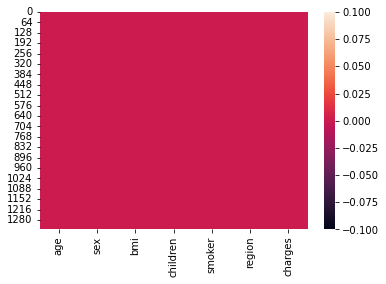

In [11]:
sns.heatmap(df.isnull())  # Checking with heatmap 

In [12]:
for i in df.columns:
    print(df[i].value_counts())   # By seeing this value count our target variable is charges and its continuous problem
    print("\n")                   # So have to gohead with linear regression.

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [13]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
df['charges'].nunique()

1337

In [15]:
df.duplicated().sum()    # Only one row is duplicate

1

In [16]:
df.drop_duplicates(inplace=True)  # Removed duplicate row from the dataset permanently.

In [17]:
df.shape

(1337, 7)

In [18]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


1. Count of all column is 1337 this shows no null values or wide values.
2. All the columns mean is greater than median so the data is "Right skewed"
3. No Left skewness
4. Outiers are present in the charges column.


#                               Exploratory Data Analysis-EDA

<AxesSubplot:xlabel='sex', ylabel='count'>

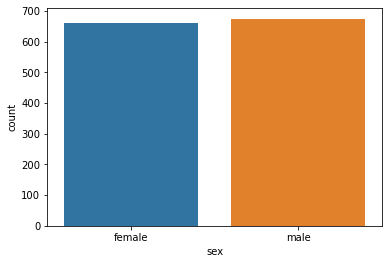

In [19]:
sns.countplot(df['sex'])  # Univariant Analysis

<AxesSubplot:xlabel='age'>

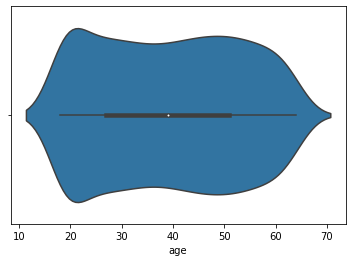

In [20]:
sns.violinplot(df['age'])

<AxesSubplot:xlabel='children', ylabel='count'>

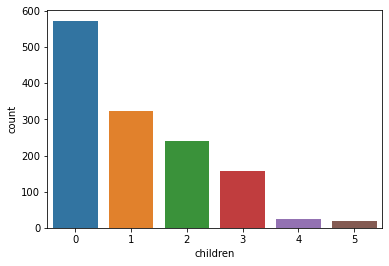

In [21]:
sns.countplot(df['children'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

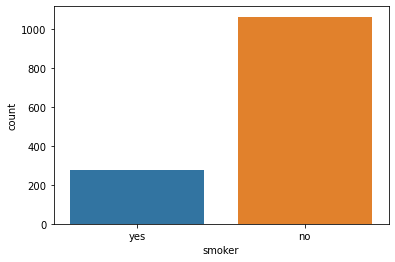

In [22]:
sns.countplot(df['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

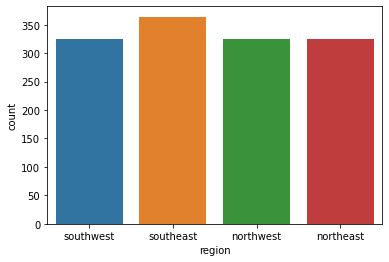

In [23]:
sns.countplot(df['region'])

<AxesSubplot:xlabel='age'>

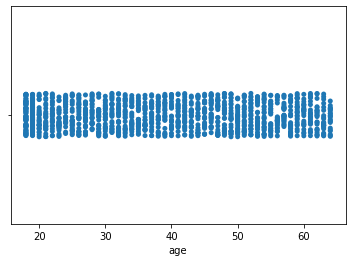

In [24]:
sns.stripplot(df['age'])

<AxesSubplot:xlabel='children'>

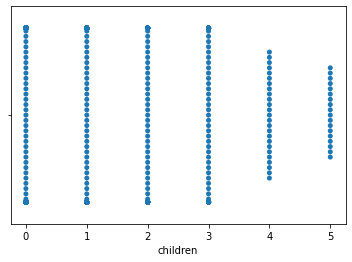

In [25]:
sns.swarmplot(df['children'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

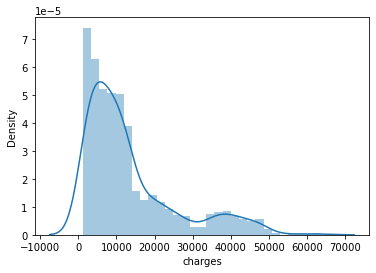

In [26]:
sns.distplot(df['charges'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

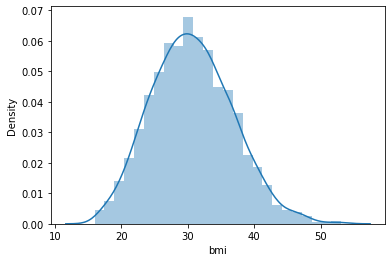

In [27]:
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='charges'>

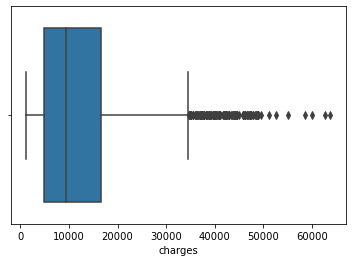

In [28]:
sns.boxplot(df['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

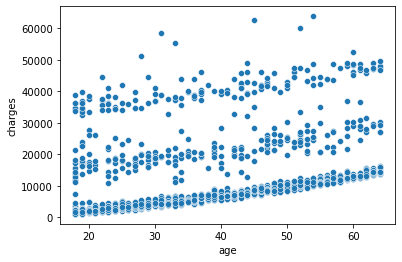

In [29]:
sns.scatterplot(x='age',y='charges',data=df)     # Bivariant analysis

<AxesSubplot:xlabel='age', ylabel='bmi'>

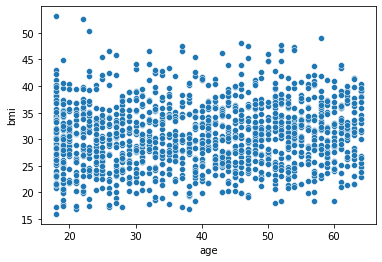

In [30]:
sns.scatterplot(x='age',y='bmi',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

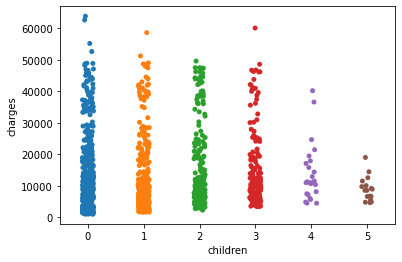

In [31]:
sns.stripplot(x='children',y='charges',data=df)

<AxesSubplot:xlabel='sex', ylabel='age'>

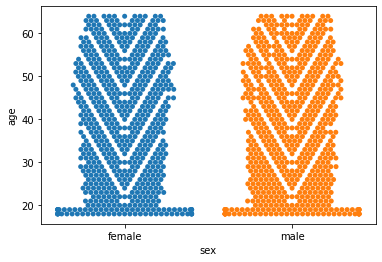

In [32]:
sns.swarmplot(x='sex',y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

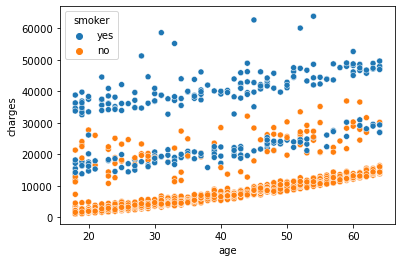

In [33]:
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

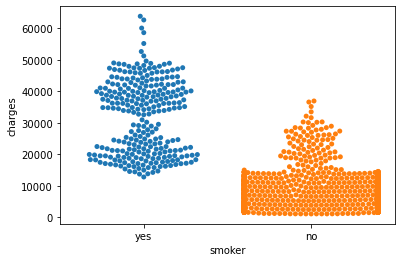

In [34]:
sns.swarmplot(x='smoker',y='charges',data=df)

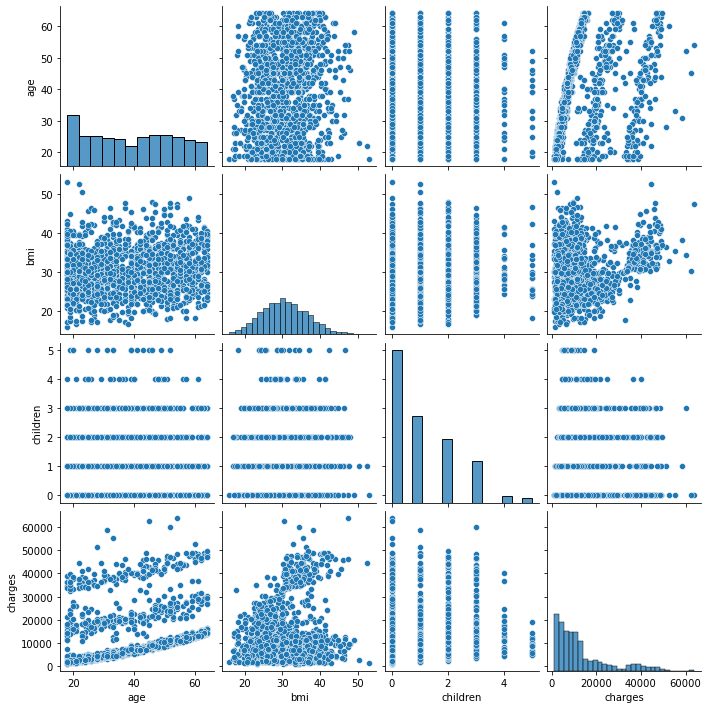

In [35]:
sns.pairplot(df)     # multivariant analysis

In [36]:
numeric_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':                        # Separating numeric column and categorical column.
        numeric_col.append(i)
print("Numeric Columns : ",numeric_col)

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical Columns : ",categorical_col)

Numeric Columns :  ['age', 'bmi', 'children', 'charges']
Categorical Columns :  ['sex', 'smoker', 'region']


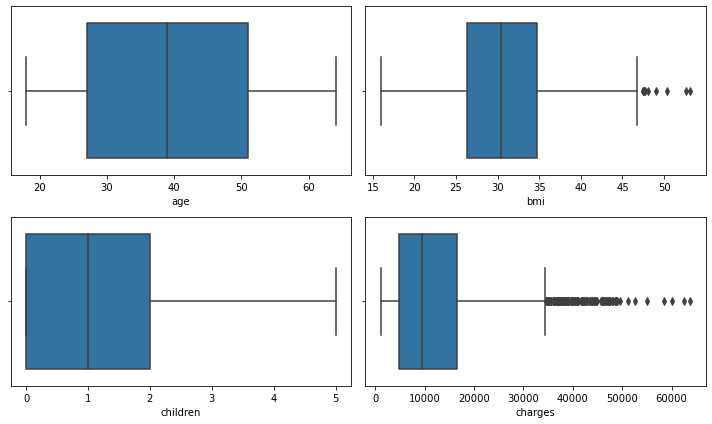

In [37]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for i in numeric_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)                # Checking the outliers.
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()

By seeing this boxplot outliers are present in the bmi column and charges column.

In [38]:
df.skew() # Checking Skewness

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

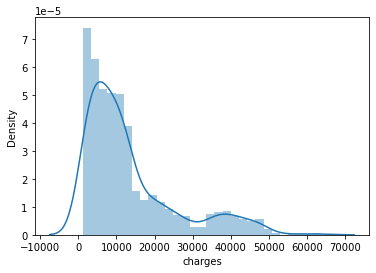

In [39]:
sns.distplot(df['charges'])

<AxesSubplot:xlabel='children', ylabel='Density'>

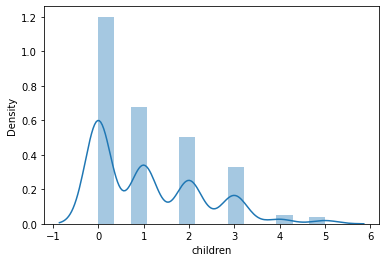

In [40]:
sns.distplot(df['children'])

<AxesSubplot:xlabel='bmi', ylabel='Density'>

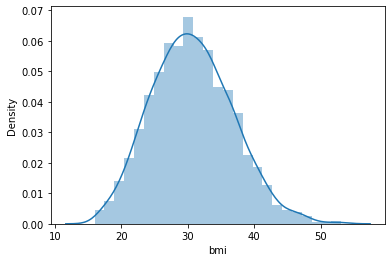

In [41]:
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='age', ylabel='Density'>

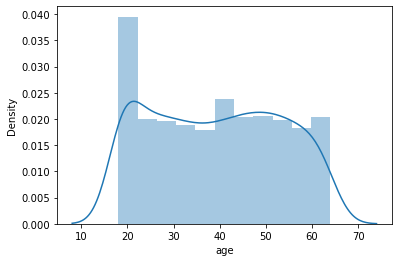

In [42]:
sns.distplot(df['age'])

In [43]:
df['charges']=np.cbrt(df['charges'])

In [44]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     0.515480
dtype: float64

In [45]:
df['children']=np.cbrt(df['children'])

In [46]:
df.skew()     # skewness reduced

age         0.054781
bmi         0.283914
children   -0.098682
charges     0.515480
dtype: float64

In [49]:
from sklearn.preprocessing import LabelEncoder #Using Label Encoder to encode the string value or object column data to int format.
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.00000,1,3,25.654666
1,18,1,33.770,1.00000,0,2,11.994331
2,28,1,33.000,1.44225,0,2,16.447599
3,33,1,22.705,0.00000,0,1,28.013799
4,32,1,28.880,0.00000,0,1,15.695891
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.44225,0,1,21.967271
1334,18,0,31.920,0.00000,0,0,13.017690
1335,18,0,36.850,0.00000,0,2,11.768318
1336,21,0,25.800,0.00000,0,3,12.615872


In [50]:
df.corr()           # Checking corelation of two independent varible and with target variable.

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.047775,-0.025587,0.001626,0.450464
sex,-0.019814,1.000000,0.046397,0.017024,0.076596,0.004936,0.028710
bmi,0.109344,0.046397,1.000000,0.016512,0.003746,0.157574,0.156494
children,0.047775,0.017024,0.016512,1.000000,0.011411,0.013750,0.127419
smoker,-0.025587,0.076596,0.003746,0.011411,1.000000,-0.002358,0.732684
region,0.001626,0.004936,0.157574,0.013750,-0.002358,1.000000,-0.030361
charges,0.450464,0.028710,0.156494,0.127419,0.732684,-0.030361,1.000000


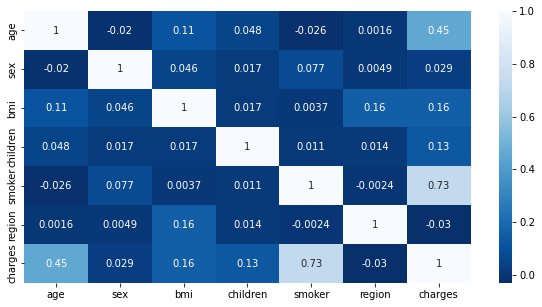

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='Blues_r',annot=True) # Checking correlation with heatmap
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

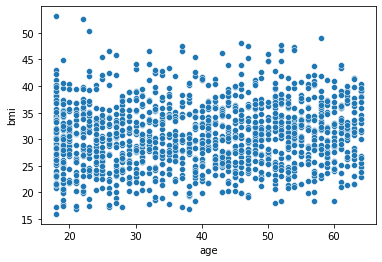

In [52]:
sns.scatterplot(x='age',y='bmi',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

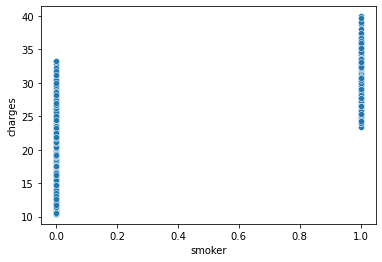

In [53]:
sns.scatterplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

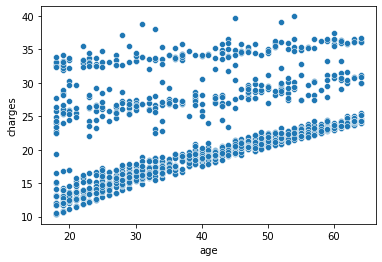

In [54]:
sns.scatterplot(x='age',y='charges',data=df)

<AxesSubplot:xlabel='region', ylabel='bmi'>

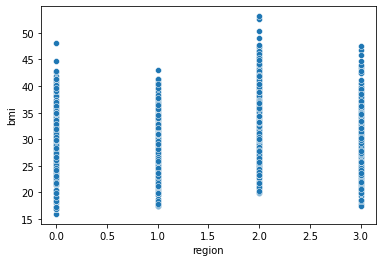

In [55]:
sns.scatterplot(x='region',y='bmi',data=df)

In [56]:
from scipy.stats import zscore
x=df.iloc[:,:-1]                            # Removing the outliers from the dataset
y=df.iloc[:,-1]
z=np.abs(zscore(x))
z


,age,sex,bmi,children,smoker,region
0,1.440418,1.009771,0.453160,1.118544,1.969660,1.343163
1,1.511647,0.990324,0.509422,0.501220,0.507702,0.438017
2,0.799350,0.990324,0.383155,1.217560,0.507702,0.438017
3,0.443201,0.990324,1.305052,1.118544,0.507702,0.467128
4,0.514431,0.990324,0.292456,1.118544,0.507702,0.467128
...,...,...,...,...,...,...
1333,0.767704,0.990324,0.050269,1.217560,0.507702,0.467128
1334,1.511647,1.009771,0.206053,1.118544,0.507702,1.372274
1335,1.511647,1.009771,1.014490,1.118544,0.507702,0.438017
1336,1.297958,1.009771,0.797524,1.118544,0.507702,1.343163


In [57]:
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([2, 2, 2, 2], dtype=int64))

In [58]:
z.iloc[116,2]

3.0167243979459

In [59]:
z.iloc[846,2]

3.2331821895290602

In [60]:
x1=x[(z<3).all(axis=1)]
y1=y[(z<3).all(axis=1)]

In [61]:
x1.shape   # Only 4 rows has outliers.So the loss percentage is very less and in acceptable range

(1333, 6)

In [62]:
y1.shape

(1333,)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Checking the VIF value for multicolinearity
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features']=x1.columns
vif

,VIF Values,Features
0,7.710488,age
1,1.990161,sex
2,10.684820,bmi
3,2.207113,children
4,1.257217,smoker
5,2.915567,region


Multicolinearity problem is there but its in acceptable range so we are not dropping any column.

In [64]:
from sklearn.preprocessing import StandardScaler          # Doing standard scaling to overcome biasness.
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,age,sex,bmi,children,smoker,region
0,-1.443917,-1.006775,-0.450191,-1.119053,1.970478,1.342851
1,-1.515225,0.993271,0.527991,0.500107,-0.507491,0.438800
2,-0.802147,0.993271,0.399678,1.216180,-0.507491,0.438800
3,-0.445607,0.993271,-1.315891,-1.119053,-0.507491,-0.465250
4,-0.516915,0.993271,-0.286883,-1.119053,-0.507491,-0.465250
...,...,...,...,...,...,...
1328,0.766626,0.993271,0.061396,1.216180,-0.507491,-0.465250
1329,-1.515225,-1.006775,0.219705,-1.119053,-0.507491,-1.369301
1330,-1.515225,-1.006775,1.041245,-1.119053,-0.507491,0.438800
1331,-1.301302,-1.006775,-0.800137,-1.119053,-0.507491,1.342851


# Machine Learning Models

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [66]:
maxaccu=0
maxrs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_lr=lr.predict(x_test)
    acc=r2_score(y_test,pred_lr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Maximum r2 score : ",maxaccu," on random state : ",maxrs)


Maximum r2 score :  0.8423968535515259  on random state :  462


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=maxrs,test_size=.30)

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge

In [69]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_LR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_LR))
print("Mean squared error ",mean_squared_error(y_test,pred_LR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 Score  0.8423968535515259
Mean absolute error  1.9033873926300238
Mean squared error  7.120736455053804
Root mean squared error  2.6684708083570645


In [70]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_GBR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_GBR))
print("Mean squared error ",mean_squared_error(y_test,pred_GBR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score  0.8980800006359638
Mean absolute error  1.3197077038581233
Mean squared error  4.604891915706926
Root mean squared error  2.145901189641994


In [71]:
lso=Lasso()
lso.fit(x_train,y_train)
pred_lso=lso.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_lso))
print("Mean absolute error ",mean_absolute_error(y_test,pred_lso))
print("Mean squared error ",mean_squared_error(y_test,pred_lso))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_lso)))

R2 Score  0.7212241229207881
Mean absolute error  2.798244838327487
Mean squared error  12.595494413917288
Root mean squared error  3.549013160572568


In [72]:
rdg=Ridge()
rdg.fit(x_train,y_train)
pred_rdg=rdg.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_rdg))
print("Mean absolute error ",mean_absolute_error(y_test,pred_rdg))
print("Mean squared error ",mean_squared_error(y_test,pred_rdg))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_rdg)))

R2 Score  0.8422473348921329
Mean absolute error  1.905495477260332
Mean squared error  7.127491922775378
Root mean squared error  2.669736302104644


In [73]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_knr))
print("Mean absolute error ",mean_absolute_error(y_test,pred_knr))
print("Mean squared error ",mean_squared_error(y_test,pred_knr))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_knr)))

R2 Score  0.8473346944188532
Mean absolute error  1.7147592559093
Mean squared error  6.897637714542764
Root mean squared error  2.626335415468246


In [74]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_RFR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_RFR))
print("Mean squared error ",mean_squared_error(y_test,pred_RFR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 Score  0.8658910294819568
Mean absolute error  1.4221915757062322
Mean squared error  6.059235851803082
Root mean squared error  2.4615515131321306


In [75]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_DTR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_DTR))
print("Mean squared error ",mean_squared_error(y_test,pred_DTR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 Score  0.6808093994510153
Mean absolute error  1.8234604210656682
Mean squared error  14.421489650796747
Root mean squared error  3.7975636467078138


In [76]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_ETR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_ETR))
print("Mean squared error ",mean_squared_error(y_test,pred_ETR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2 Score  0.8366655103135027
Mean absolute error  1.4474857672512855
Mean squared error  7.379686772043581
Root mean squared error  2.7165578904274397


In [77]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
pred_BR=BR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_BR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_BR))
print("Mean squared error ",mean_squared_error(y_test,pred_BR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_BR)))

R2 Score  0.8387949854821124
Mean absolute error  1.5499582872519568
Mean squared error  7.283474026264367
Root mean squared error  2.6987912157601905


In [78]:
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred_ABR=ABR.predict(x_test)
print("R2 Score ",r2_score(y_test,pred_ABR))
print("Mean absolute error ",mean_absolute_error(y_test,pred_ABR))
print("Mean squared error ",mean_squared_error(y_test,pred_ABR))
print("Root mean squared error ",np.sqrt(mean_squared_error(y_test,pred_ABR)))

R2 Score  0.7989395369719592
Mean absolute error  2.405801023100626
Mean squared error  9.084200417418952
Root mean squared error  3.0140007328165916


Out of 10 models GradientBoostingRegressor is perfroming wel.

In [79]:
from sklearn.model_selection import cross_val_score    # Checking with crossvalidation
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_LR)-score.mean())

[0.80608906 0.70344199 0.83361066 0.77338795 0.76340967]
0.7759878660814935
Difference between R2 score and cross val score :  0.06640898747003243


In [80]:
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_GBR)-score.mean())

[0.86663885 0.7470759  0.89633016 0.83630051 0.82729291]
0.834727665878457
Difference between R2 score and cross val score :  0.06335233475750679


In [81]:
score=cross_val_score(lso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_lso)-score.mean())

[0.64328113 0.61714214 0.64207996 0.6349896  0.57636688]
0.622771939790589
Difference between R2 score and cross val score :  0.0984521831301991


In [82]:
score=cross_val_score(rdg,x,y)
print(score)
print(score.mean())
print("Difference between R2 Score and cross val score : ",r2_score(y_test,pred_rdg)-score.mean())

[0.80598621 0.70394965 0.8330834  0.77373533 0.76310181]
0.7759712796261828
Difference between R2 Score and cross val score :  0.06627605526595004


In [83]:
score=cross_val_score(knr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_knr)-score.mean())

[0.28597595 0.22036076 0.20250076 0.2863647  0.20366451]
0.23977333956098384
Difference between R2 score and cross val score :  0.6075613548578693


In [84]:
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_RFR)-score.mean())

[0.84823646 0.72056182 0.84958979 0.81624593 0.80774078]
0.8084749534436027
Difference between R2 score and cross val score :  0.05741607603835419


In [85]:
score=cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_DTR)-score.mean())

[0.72637152 0.60233769 0.66256433 0.679487   0.60074656]
0.6543014204162056
Difference between R2 score and cross val score :  0.026507979034809614


In [86]:
score=cross_val_score(ETR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_ETR)-score.mean())

[0.81323523 0.68263988 0.83894239 0.78493432 0.80510896]
0.7849721545764955
Difference between R2 score and cross val score :  0.051693355737007174


In [87]:
score=cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_ABR)-score.mean())

[0.81515651 0.72877807 0.81762722 0.77567474 0.7896478 ]
0.7853768664565077
Difference between R2 score and cross val score :  0.013562670515451458


In [88]:
score=cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross val score : ",r2_score(y_test,pred_BR)-score.mean())

[0.82620276 0.71602799 0.82471062 0.81455714 0.79286838]
0.7948733785996925
Difference between R2 score and cross val score :  0.04392160688241986


In [89]:
from sklearn.model_selection import GridSearchCV
parameters={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
            'n_estimators':[10,25,48,70],
            'random_state':[10,250,100]}                     # Using Hyperparameter tuning to improve the model performance 

gscv=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [10, 25, 48, 70],
                         'random_state': [10, 250, 100]})

In [90]:
gscv.best_params_

{'loss': 'squared_error', 'n_estimators': 48, 'random_state': 100}

In [91]:
final_model=GradientBoostingRegressor(loss='squared_error',n_estimators=48,random_state=100)
final_model.fit(x_train,y_train)
pred_fin_model=final_model.predict(x_test)                # Gradient boosting is the performing wel compare to all other models.
r2score=r2_score(y_test,pred_fin_model)
print(r2score*100)

89.84099547108038


In [92]:
import pickle
filename='Medical Insurance'                                 # Saving the model using pickle library
pickle.dump(final_model,open(filename,'wb'))
loaded_model=pickle.load(open('Medical Insurance','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

89.84099547108038


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Predicted,27.554799,22.296023,23.677508,21.804144,16.821155,18.472850,23.201897,25.550587,21.668155,21.135776,...,22.958332,23.969723,13.560791,15.247560,19.635434,21.348110,21.373144,14.057113,18.201219,34.502055
Original,26.934107,21.656357,22.409295,20.991300,15.688249,18.015334,22.797299,29.672616,20.338781,20.940246,...,27.426374,23.287608,12.343077,13.819176,19.015648,21.613762,20.878970,12.814147,16.824408,35.275747
